<a href="https://colab.research.google.com/github/Harman1107/Major_Project_Parkinson/blob/master/models_of_major_project_using_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('./eeg_dataset(2).csv')

In [ ]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Status
0,-0.018572,-0.016547,-0.012220,-0.026548,-0.015249,-0.012315,-0.005031,-0.014535,-0.012051,-0.009093,...,-0.011194,-0.010850,-0.009106,-0.014477,-0.010789,-0.008840,-0.010232,-0.007059,-0.009808,0
1,-0.015544,-0.007960,-0.009142,-0.004414,0.002998,-0.005721,-0.001822,0.005940,-0.007404,0.002348,...,-0.001600,0.000081,-0.002471,-0.003974,-0.014098,-0.005188,-0.014829,-0.000739,-0.002891,0
2,-0.013005,-0.014493,-0.005920,-0.007964,-0.004377,-0.002638,-0.010482,-0.003170,-0.000205,-0.001762,...,-0.008962,-0.005190,-0.004611,-0.013489,-0.006619,-0.014944,-0.010761,-0.004509,0.004039,1
3,-0.009478,-0.013750,-0.005022,-0.013594,-0.005313,-0.007160,-0.002833,-0.003069,-0.001594,0.001301,...,-0.002374,-0.001580,-0.007699,-0.011463,-0.005926,-0.008118,-0.002620,-0.007471,-0.003515,0
4,-0.002619,-0.006864,-0.006059,-0.013748,-0.001356,-0.009366,-0.009207,0.001396,-0.001500,-0.002128,...,-0.004904,-0.006360,-0.004691,-0.008551,-0.005941,-0.002934,0.007832,0.000120,-0.004394,1


In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(30, 33)

In [ ]:
for column in parkinsons_data.columns:
    if parkinsons_data[column].dtype == 'object':
        parkinsons_data = parkinsons_data.drop(column, axis=1)

In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fp1     30 non-null     float64
 1   AF3     30 non-null     float64
 2   F7      30 non-null     float64
 3   F3      30 non-null     float64
 4   FC1     30 non-null     float64
 5   FC5     30 non-null     float64
 6   T7      30 non-null     float64
 7   C3      30 non-null     float64
 8   CP1     30 non-null     float64
 9   CP5     30 non-null     float64
 10  P7      30 non-null     float64
 11  P3      30 non-null     float64
 12  Pz      30 non-null     float64
 13  PO3     30 non-null     float64
 14  O1      30 non-null     float64
 15  Oz      30 non-null     float64
 16  O2      30 non-null     float64
 17  PO4     30 non-null     float64
 18  P4      30 non-null     float64
 19  P8      30 non-null     float64
 20  CP6     30 non-null     float64
 21  CP2     30 non-null     float64
 22  C4  

In [ ]:
# plt.plot(parkinsons_data)
# plt.show()


In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

Fp1       0
AF3       0
F7        0
F3        0
FC1       0
FC5       0
T7        0
C3        0
CP1       0
CP5       0
P7        0
P3        0
Pz        0
PO3       0
O1        0
Oz        0
O2        0
PO4       0
P4        0
P8        0
CP6       0
CP2       0
C4        0
T8        0
FC6       0
FC2       0
F4        0
F8        0
AF4       0
Fp2       0
Fz        0
Cz        0
Status    0
dtype: int64

In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Status
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.004994,-0.003704,-0.002668,-0.003132,-0.001926,-0.002208,-0.001677,0.000912,-0.000057,0.000652,...,-0.003825,-0.000303,-0.003240,-0.005559,-0.002788,-0.002705,-0.004137,-0.001179,0.000009,0.500000
std,0.008670,0.008220,0.007316,0.009168,0.006368,0.006689,0.007003,0.006910,0.005786,0.005757,...,0.006273,0.007041,0.006344,0.007547,0.008073,0.008741,0.008217,0.008670,0.006238,0.508548
min,-0.020594,-0.016670,-0.013366,-0.026548,-0.015249,-0.014222,-0.012017,-0.014535,-0.012051,-0.014933,...,-0.019470,-0.012326,-0.015042,-0.014477,-0.014098,-0.020858,-0.021175,-0.014712,-0.016635,0.000000
25%,-0.010199,-0.009709,-0.006476,-0.007839,-0.005240,-0.007125,-0.005165,-0.002941,-0.003429,-0.002113,...,-0.007168,-0.005241,-0.007603,-0.010535,-0.007421,-0.007941,-0.009177,-0.007040,-0.004145,0.000000
50%,-0.005218,-0.003991,-0.003840,-0.004676,-0.002688,-0.002646,-0.002397,0.001130,0.000055,0.001016,...,-0.003639,-0.001365,-0.004221,-0.008039,-0.005406,-0.002909,-0.003355,-0.001996,-0.000147,0.500000
75%,-0.000216,0.001983,0.001339,0.001907,0.000830,0.002378,-0.000782,0.004653,0.004441,0.004066,...,-0.000946,0.003190,0.000564,-0.002504,0.000917,0.000969,0.000127,0.000872,0.004620,1.000000
max,0.018389,0.016121,0.021652,0.017025,0.021726,0.010559,0.024101,0.023857,0.012009,0.011203,...,0.007445,0.018850,0.013796,0.017983,0.018864,0.018009,0.011572,0.023451,0.012831,1.000000


In [ ]:
# distribution of target Variable
parkinsons_data['Status'].value_counts()

0    15
1    15
Name: Status, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [ ]:
# grouping the data based on the target variable
parkinsons_data.groupby('Status').mean()

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
Status,,,,,,,,,,,,,,,,,,,,,
0,-0.006065,-0.005119,-0.005552,-0.004754,-0.003755,-0.005371,-0.001420,-0.001518,-0.001478,-0.001470,...,-0.001336,-0.003406,-0.000142,-0.004426,-0.007029,-0.002464,-0.003078,-0.005876,-0.004158,-0.000967
1,-0.003923,-0.002290,0.000217,-0.001511,-0.000097,0.000954,-0.001934,0.003343,0.001364,0.002774,...,0.000070,-0.004244,-0.000465,-0.002055,-0.004090,-0.003111,-0.002332,-0.002398,0.001801,0.000986


Data Pre-Processing

Separating the features & Target

In [ ]:
X = parkinsons_data.drop(columns=['Status'], axis=1)
Y = parkinsons_data['Status']

In [ ]:
# print(X)

In [ ]:
# print(Y)

Splitting the data to training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.233, random_state=28)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(30, 32) (23, 32) (7, 32)


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# print(X_train)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already scaled the features as shown in the provided code
# X_train_scaled and X_test_scaled

# Reshape the input data for LSTM
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Create and configure the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(1, X_train_scaled.shape[1]), activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train_lstm, Y_train, epochs=10, batch_size=32)

# Evaluate the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_lstm, Y_test)
print("Test Loss (LSTM):", loss_lstm)
print("Test Accuracy (LSTM):", accuracy_lstm)

# Make predictions on the test set
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = np.round(y_pred_lstm).flatten()

# Calculate the F1 score for LSTM
f1_lstm = f1_score(Y_test, y_pred_lstm)
print("F1 Score (LSTM):", f1_lstm)

# Calculate the precision for LSTM
precision_lstm = precision_score(Y_test, y_pred_lstm)
print("Precision (LSTM):", precision_lstm)

# Calculate the recall for LSTM
recall_lstm = recall_score(Y_test, y_pred_lstm)
print("Recall (LSTM):", recall_lstm)

# Calculate the mean squared error (MSE) for LSTM
mse_lstm = mean_squared_error(Y_test, y_pred_lstm)
print("MSE (LSTM):", mse_lstm)

# Calculate the mean absolute error (MAE) for LSTM
mae_lstm = mean_absolute_error(Y_test, y_pred_lstm)
print("MAE (LSTM):", mae_lstm)

# Calculate the mean absolute percentage error (MAPE) for LSTM
mape_lstm = np.mean(np.abs((Y_test - y_pred_lstm) / Y_test)) * 100
print("MAPE (LSTM):", mape_lstm)

cm_lstm = confusion_matrix(Y_test, y_pred_lstm)
cm_display_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=[False, True])
cm_display_lstm.plot()
plt.title("Confusion Matrix for LSTM")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already scaled the features as shown in the provided code
# X_train_scaled and X_test_scaled

# Create and configure the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Calculate the accuracy of the logistic regression model
accuracy_logistic = accuracy_score(Y_test, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)

# Calculate the F1 score for logistic regression
f1_logistic = f1_score(Y_test, y_pred_logistic)
print("F1 Score (Logistic Regression):", f1_logistic)

# Calculate the precision for logistic regression
precision_logistic = precision_score(Y_test, y_pred_logistic)
print("Precision (Logistic Regression):", precision_logistic)

# Calculate the recall for logistic regression
recall_logistic = recall_score(Y_test, y_pred_logistic)
print("Recall (Logistic Regression):", recall_logistic)

# Calculate the mean squared error (MSE) for logistic regression
mse_logistic = mean_squared_error(Y_test, y_pred_logistic)
print("MSE (Logistic Regression):", mse_logistic)

# Calculate the mean absolute error (MAE) for logistic regression
mae_logistic = mean_absolute_error(Y_test, y_pred_logistic)
print("MAE (Logistic Regression):", mae_logistic)

# Calculate the mean absolute percentage error (MAPE) for logistic regression
mape_logistic = np.mean(np.abs((Y_test - y_pred_logistic) / Y_test)) * 100
print("MAPE (Logistic Regression):", mape_logistic)

cm_logistic = confusion_matrix(Y_test, y_pred_logistic)
cm_display_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=[False, True])
cm_display_logistic.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already scaled the features as shown in the provided code
# X_train_scaled and X_test_scaled

# Create and configure the base weak learner (Decision Tree in this case)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create and configure the AdaBoost model
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test_scaled)

# Calculate the accuracy of the AdaBoost model
accuracy_adaboost = accuracy_score(Y_test, y_pred_adaboost)
print("Accuracy (AdaBoost):", accuracy_adaboost)

# Calculate the F1 score for AdaBoost
f1_adaboost = f1_score(Y_test, y_pred_adaboost)
print("F1 Score (AdaBoost):", f1_adaboost)

# Calculate the precision for AdaBoost
precision_adaboost = precision_score(Y_test, y_pred_adaboost)
print("Precision (AdaBoost):", precision_adaboost)

# Calculate the recall for AdaBoost
recall_adaboost = recall_score(Y_test, y_pred_adaboost)
print("Recall (AdaBoost):", recall_adaboost)

# Calculate the mean squared error (MSE) for AdaBoost
mse_adaboost = mean_squared_error(Y_test, y_pred_adaboost)
print("MSE (AdaBoost):", mse_adaboost)

# Calculate the mean absolute error (MAE) for AdaBoost
mae_adaboost = mean_absolute_error(Y_test, y_pred_adaboost)
print("MAE (AdaBoost):", mae_adaboost)

# Calculate the mean absolute percentage error (MAPE) for AdaBoost
mape_adaboost = np.mean(np.abs((Y_test - y_pred_adaboost) / Y_test)) * 100
print("MAPE (AdaBoost):", mape_adaboost)

cm_adaboost = confusion_matrix(Y_test, y_pred_adaboost)
cm_display_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost, display_labels=[False, True])
cm_display_adaboost.plot()
plt.title("Confusion Matrix for AdaBoost")
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create and configure the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', random_state=42)

# Train the model
mlp.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate the model
f1_mlp = f1_score(Y_test, y_pred_mlp)
print("F1 Score (MLP):", f1_mlp)

precision_mlp = precision_score(Y_test, y_pred_mlp)
print("Precision (MLP):", precision_mlp)

recall_mlp = recall_score(Y_test, y_pred_mlp)
print("Recall (MLP):", recall_mlp)

mse_mlp = mean_squared_error(Y_test, y_pred_mlp)
print("MSE (MLP):", mse_mlp)

mae_mlp = mean_absolute_error(Y_test, y_pred_mlp)
print("MAE (MLP):", mae_mlp)

# Calculate the mean absolute percentage error (MAPE) for MLP
mape_mlp = np.mean(np.abs((Y_test - y_pred_mlp) / Y_test)) * 100
print("MAPE (MLP):", mape_mlp)

cm_mlp = confusion_matrix(Y_test, y_pred_mlp)
cm_display_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=[False, True])
cm_display_mlp.plot()
plt.title("Confusion Matrix for MLP")
plt.show()


Model Training

Support Vector Machine Model Using Different Kernel Values and Confusion Matrix

Accuracy score of training data using Kernel Value :-  linear  :  1.0 



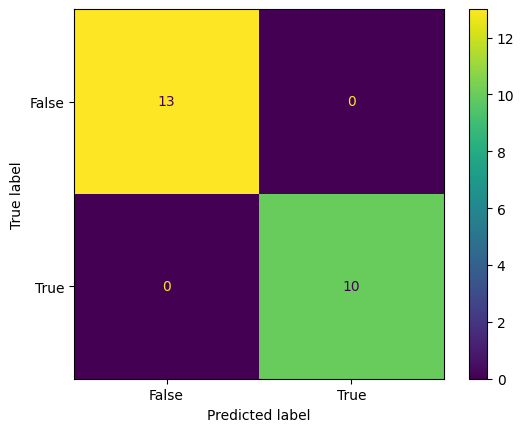

Accuracy score of training data using Kernel Value :-  poly  :  0.6521739130434783 



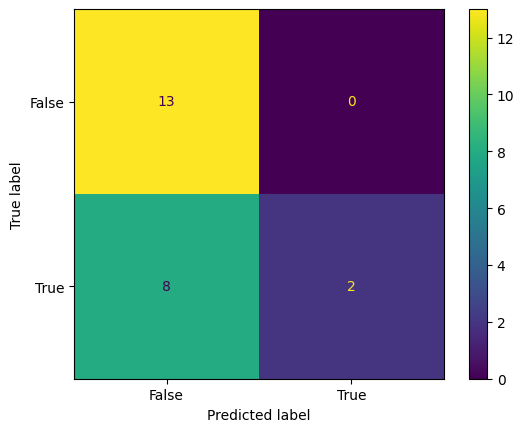

Accuracy score of training data using Kernel Value :-  rbf  :  0.8695652173913043 



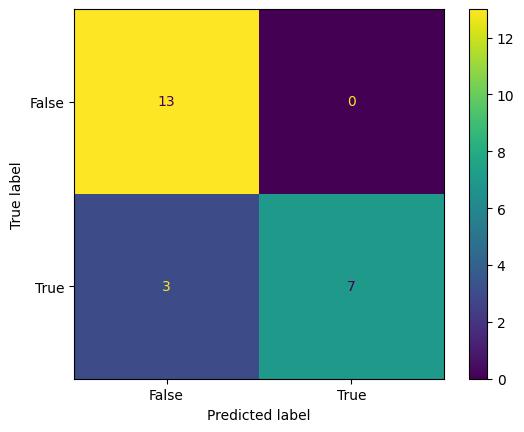

Accuracy score of training data using Kernel Value :-  sigmoid  :  0.6521739130434783 



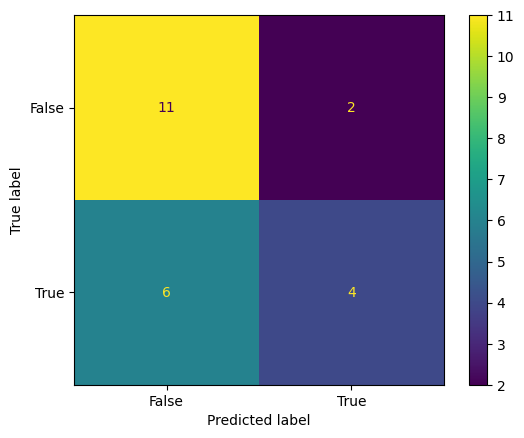

Accuracy score of training data using RF is :-  1.0
Accuracy score of training data using GNB is :-  0.6956521739130435
Accuracy score of training data using XGB is :-  0.6521739130434783


In [ ]:
kernelValues = ['linear', 'poly','rbf', 'sigmoid']
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
model_GNB = GaussianNB()
model_XGB = xgb.XGBClassifier()
for v in kernelValues:
    model = svm.SVC(kernel=v)
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    confusion_matrix =  metrics.confusion_matrix(Y_train, X_train_prediction)
    print('Accuracy score of training data using Kernel Value :- ', v," : ", training_data_accuracy,"\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    # sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='gist_heat', cbar=True)
    cm_display.plot()
    plt.show()

model_RF.fit(X_train,Y_train)
model_GNB.fit(X_train, Y_train)
model_XGB.fit(X_train, Y_train)
x_pred_xgb = model.predict(X_train)
x_pred_rf = model_RF.predict(X_train)
x_pred_gnb = model_GNB.predict(X_train)
accuracy_rf = accuracy_score(Y_train, x_pred_rf)
accuracy_gnb = accuracy_score(Y_train, x_pred_gnb)
accuracy_xgb = accuracy_score(Y_train, x_pred_xgb)
print('Accuracy score of training data using RF is :- ', accuracy_rf )
print('Accuracy score of training data using GNB is :- ', accuracy_gnb )
print('Accuracy score of training data using XGB is :- ', accuracy_xgb )



In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='sigmoid')

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on training data
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
confusion_matrix =  metrics.confusion_matrix(Y_train, X_train_prediction)

Accuracy score of training data :  0.6521739130434783


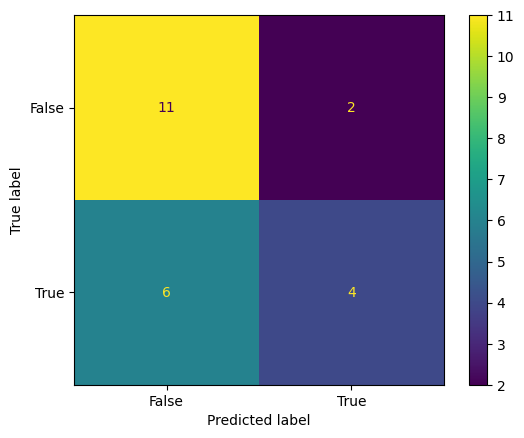

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the F1 score
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)

# Calculate the precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Calculate the recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("MSE:", mse)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("MAE:", mae)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
print("MAPE:", mape)

F1 Score: 0.5
Precision: 0.6666666666666666
Recall: 0.4
MSE: 0.5714285714285714
RMSE: 0.7559289460184544
MAE: 0.5714285714285714
MAPE: inf


# KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
k = 5  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.42857142857142855


In [ ]:
# Evaluate the model
y_pred = knn.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Calculate the F1 score
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)

# Calculate the precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Calculate the recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("MSE:", mse)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print("RMSE:", rmse)
# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("MAE:", mae)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
print("MAPE:", mape)

F1 Score: 0.33333333333333337
Precision: 1.0
Recall: 0.2
MSE: 0.5714285714285714
RMSE: 0.7559289460184544
MAE: 0.5714285714285714
MAPE: 80.0


# ANN model

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
1/1 [==============================] - 1s 557ms/step - loss: 0.7791 - accuracy: 0.6087
Epoch 2/10
1/1 [==============================] - 0s 19ms/step - loss: 0.7366 - accuracy: 0.6087
Epoch 3/10
1/1 [==============================] - 0s 15ms/step - loss: 0.7085 - accuracy: 0.6522
Epoch 4/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6864 - accuracy: 0.6522
Epoch 5/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6677 - accuracy: 0.6522
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6503 - accuracy: 0.7391
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6347 - accuracy: 0.7826
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6206 - accuracy: 0.7826
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6075 - accuracy: 0.7826
Epoch 10/10
1/1 [==============================] - 0s 136ms/step - loss: 0.7045 - accuracy: 0.5714
Test Loss: 0.70450192689895

In [ ]:
# Make predictions on the test set
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Calculate the F1 score
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)

# Calculate the precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Calculate the recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("MSE:", mse)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print("RMSE:", rmse)
# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("MAE:", mae)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
print("MAPE:", mape)

1/1 [==============================] - 0s 54ms/step
F1 Score: 0.5714285714285715
Precision: 1.0
Recall: 0.4
MSE: 0.42857142857142855
RMSE: 0.6546536707079771
MAE: 0.42857142857142855
MAPE: 60.0


# RNN model

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7576 - accuracy: 0.5217
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 0.7187 - accuracy: 0.5217
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6934 - accuracy: 0.5217
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6731 - accuracy: 0.5217
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6558 - accuracy: 0.5217
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6404 - accuracy: 0.5217
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6264 - accuracy: 0.5652
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6135 - accuracy: 0.6087
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6013 - accuracy: 0.6087
Epoch 10/10
1/1 [==============================] - 0s 361ms/step - loss: 0.9186 - accuracy: 0.1429
Test Loss: 0.9185654520988464


In [ ]:
# Make predictions on the test set
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Calculate the F1 score
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)

# Calculate the precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Calculate the recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("MSE:", mse)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print("RMSE:", rmse)
# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("MAE:", mae)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
print("MAPE:", mape)

1/1 [==============================] - 0s 191ms/step
F1 Score: 0.25
Precision: 0.3333333333333333
Recall: 0.2
MSE: 0.8571428571428571
RMSE: 0.9258200997725514
MAE: 0.8571428571428571
MAPE: inf
